In [6]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import hopsworks
import pandas as pd
import numpy as np

In [10]:
# Read the KEY_VALUE from the file "secret.txt"
with open('secret.txt', 'r') as file:
    key_value = file.read().strip()

print(key_value)

"Hii8NztTVxN0l6k9.hJf0is1Nnnoan5TdPyl9LfYwSUxiTpUqVL6wTRxQPp4gQKnFisSAAn7YAhesHNJ9"


In [ ]:
project = hopsworks.login(api_key_value=key_value)
fs = project.get_feature_store()

In [18]:
red_wine_df = pd.read_csv("red.csv")
red_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:
white_wine_df = pd.read_csv("white.csv")
white_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [61]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  9 non-null      object 
 1   fixed acidity         9 non-null      float64
 2   volatile acidity      9 non-null      float64
 3   citric acid           9 non-null      float64
 4   residual sugar        9 non-null      float64
 5   chlorides             6 non-null      float64
 6   free sulfur dioxide   6 non-null      float64
 7   total sulfur dioxide  6 non-null      float64
 8   density               6 non-null      float64
 9   pH                    6 non-null      float64
 10  sulphates             6 non-null      float64
 11  alcohol               6 non-null      float64
 12  quality               9 non-null      int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ KB


In [62]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [63]:
#PERCENTILE INFO
#print(white_wine_df.describe())
percentiles_white = white_wine_df.describe(percentiles=[0.25, 0.75])
print(percentiles_white.loc['25%'])
#print(percentiles.loc['25%', 'pH'])    #how we get individual feature percentile value
#print(type(percentiles))

fixed acidity            6.000000
volatile acidity         0.170000
citric acid              0.210000
residual sugar           2.300000
chlorides                0.035750
free sulfur dioxide     25.500000
total sulfur dioxide    89.000000
density                  0.990477
pH                       3.050000
sulphates                0.362500
alcohol                 10.650000
quality                  6.000000
Name: 25%, dtype: float64


In [64]:
#PERCENTILE_INFO
#print(red_wine_df.describe())
percentiles_red = red_wine_df.describe(percentiles=[0.25, 0.75])
print(percentiles_red.loc['25%'])

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 25%, dtype: float64


In [67]:
# ADD MISSING FEATURE VALUES USING 25 PERCENTILE TO 75 PERCENTILE RANDOM VALUES 

for column in white_wine_df.columns[1:-1]:          #Skip first and last columns, no missing values

    missing_values = white_wine_df[column].isnull()
    lower_bound = white_wine_df[column].quantile(0.25)             #Lowest random value
    upper_bound = white_wine_df[column].quantile(0.75)             #Highest random value

    random_values = np.random.uniform(lower_bound, upper_bound, size=missing_values.sum())      #size -> number of random values to generate
    white_wine_df.loc[missing_values, column] = random_values

white_wine_df.to_csv("white_cleaned.csv", index=False)

for column in red_wine_df.columns[1:-1]:          #Skip first and last columns, no missing values

    missing_values = red_wine_df[column].isnull()
    lower_bound = red_wine_df[column].quantile(0.25)             #Lowest random value
    upper_bound = red_wine_df[column].quantile(0.75)             #Highest random value

    random_values = np.random.uniform(lower_bound, upper_bound, size=missing_values.sum())      #size -> number of random values to generate
    red_wine_df.loc[missing_values, column] = random_values

red_wine_df.to_csv("red_cleaned.csv", index=False)

In [74]:
# COMBINE TWO CSV FILES TO ONE

wine_df = combined_df = pd.concat([white_wine_df, red_wine_df], ignore_index=True)

# CHANGE WHITE=0, RED=1 
wine_df['type'] = wine_df['type'].replace({'white': 1, 'red': 0})

#SAVE
wine_df.to_csv('wine_final.csv', index=False)

In [ ]:
# REMEMBER TO ADD WINE_DF INFO/DESCRIBE ETC HERE

In [76]:
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

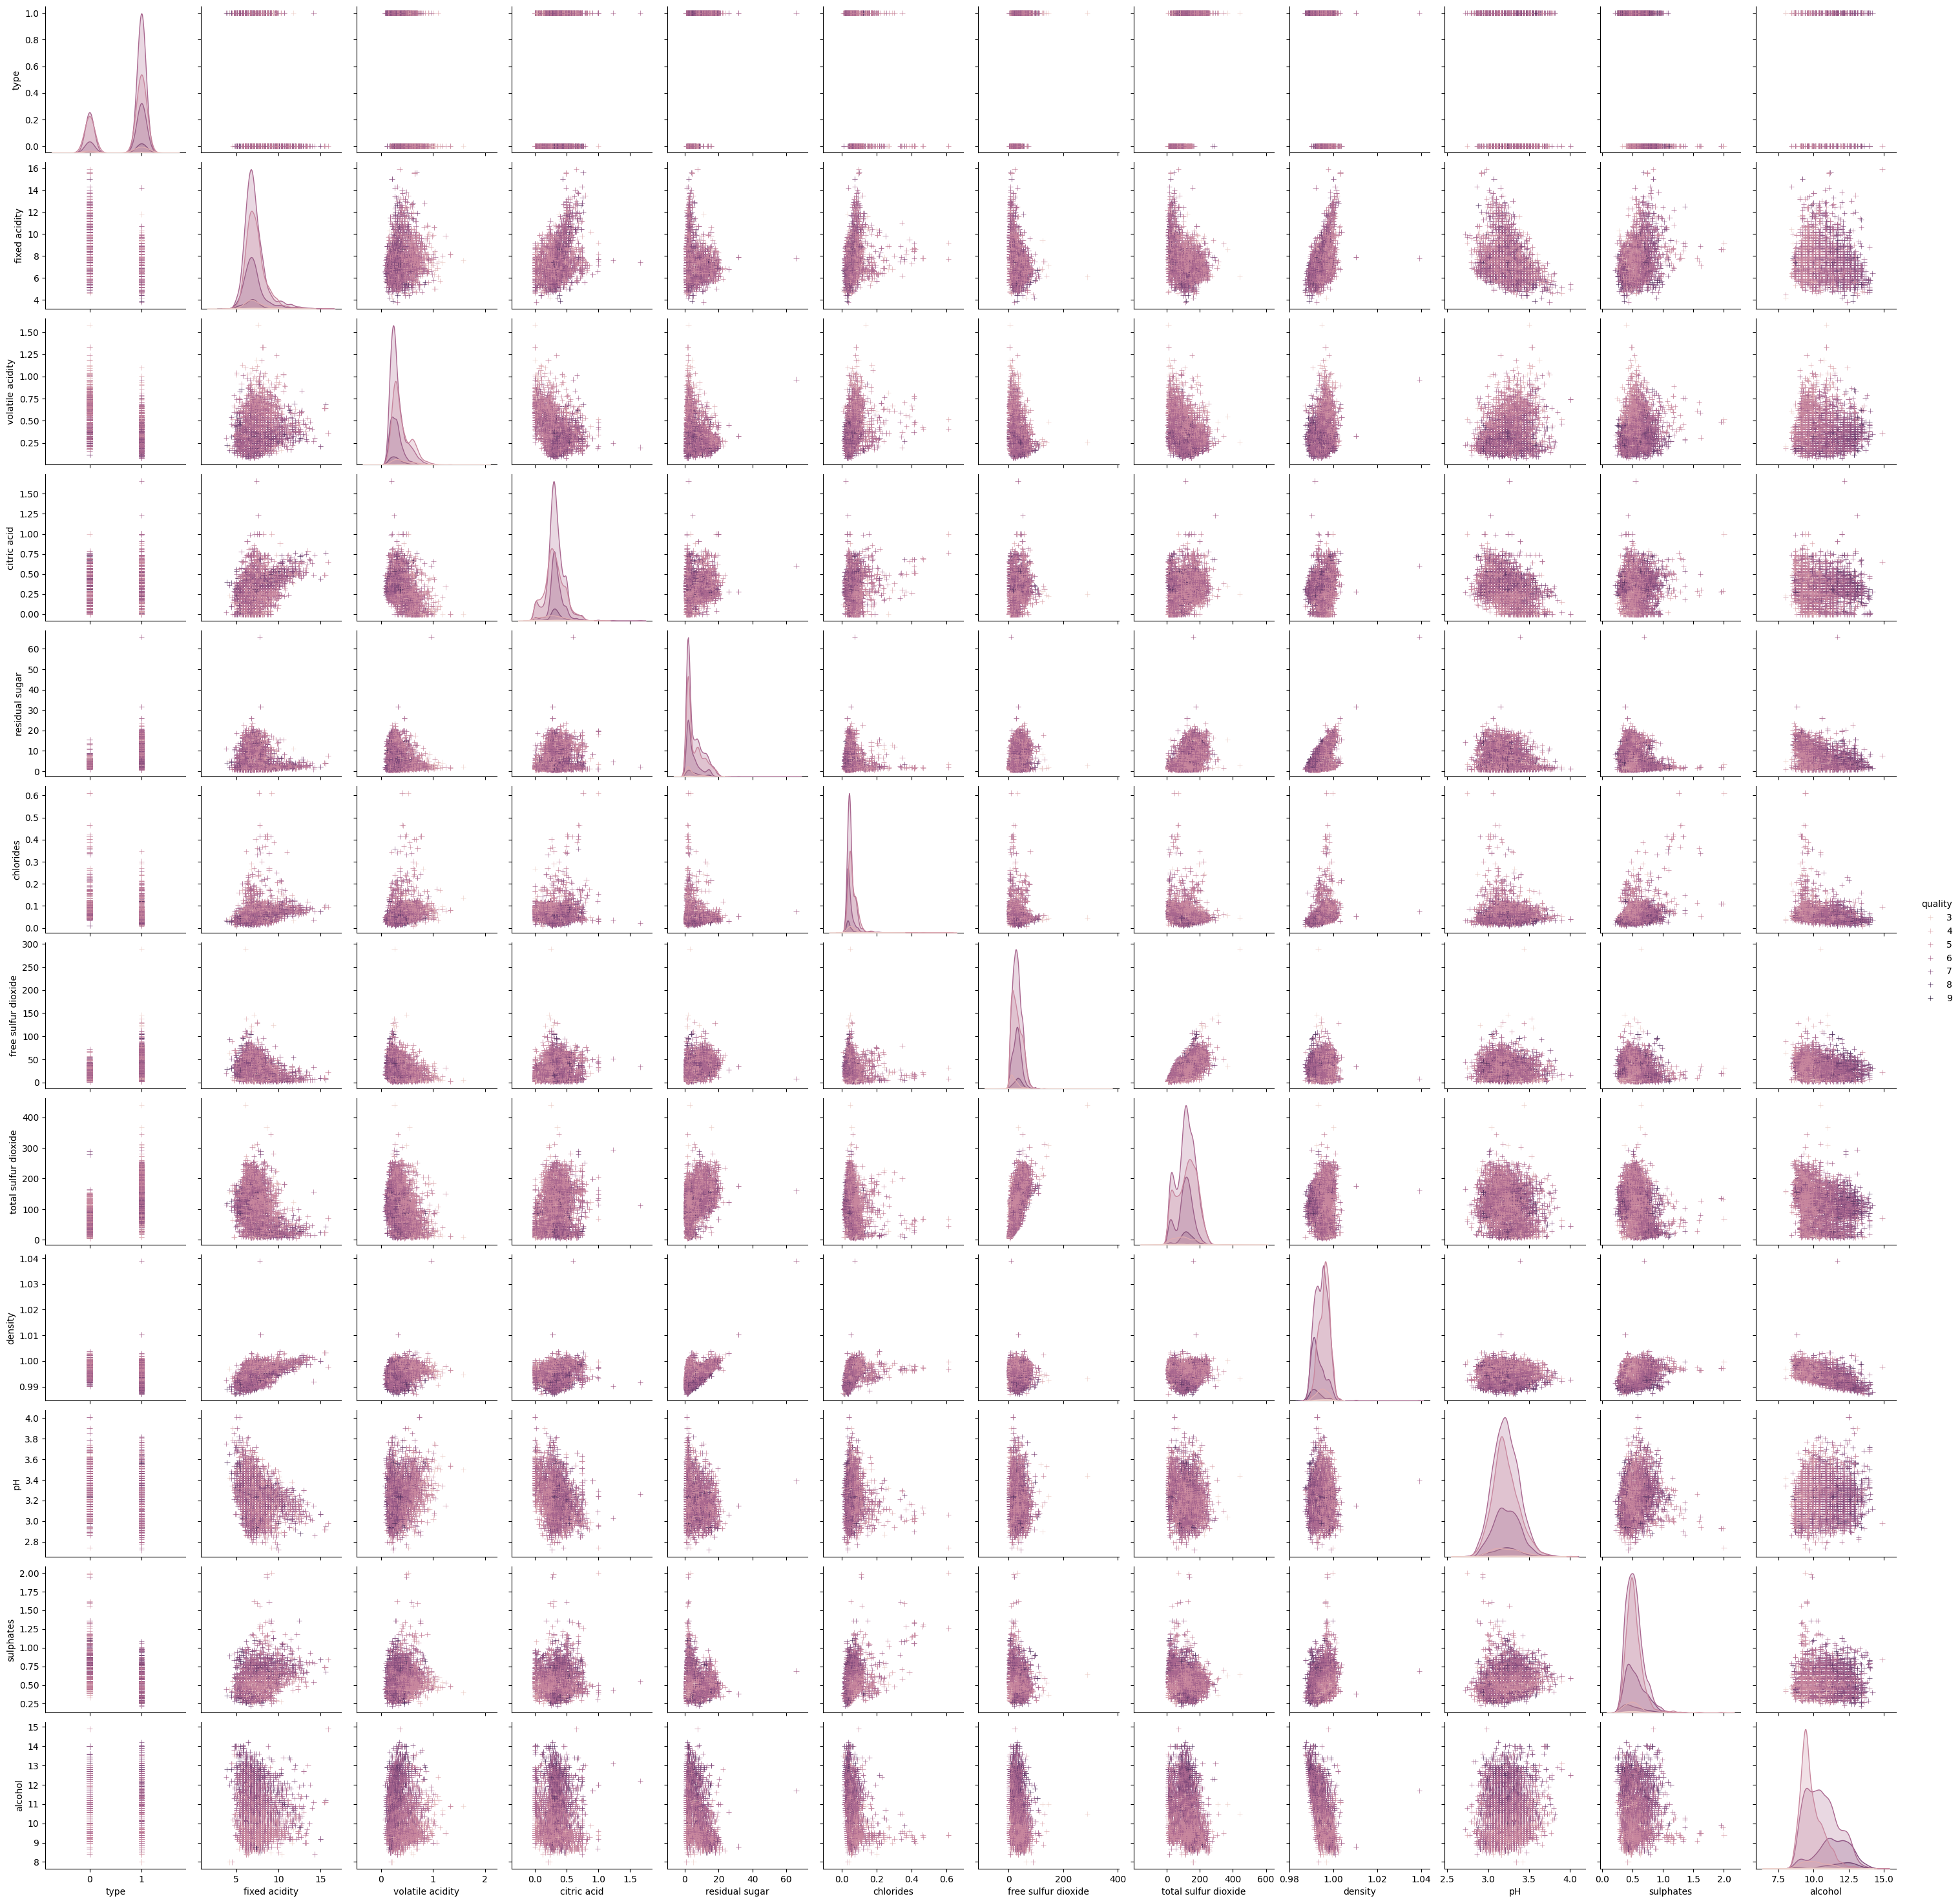

In [75]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [19]:
iris_fg = fs.get_or_create_feature_group(
    name="iris",
    version=1,
    primary_key=["sepal_length","sepal_width","petal_length","petal_width"], 
    description="Iris flower dataset")
iris_fg.insert(iris_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/193692/fs/193611/fg/206188


Uploading Dataframe: 100.00% |██████████| Rows 150/150 | Elapsed Time: 00:06 | Remaining Time: 00:00


Launching job: iris_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193692/jobs/named/iris_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fa75c603cd0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [20]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [21]:
suite = ExpectationSuite(expectation_suite_name="iris_dimensions")

expect(suite, "sepal_length", 4.5, 8.0)
expect(suite, "sepal_width", 2.1, 4.5)
expect(suite, "petal_length", 1.2, 7)
expect(suite, "petal_width", 0.2, 2.5)
iris_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193692/fs/193611/fg/206188
